<a href="https://colab.research.google.com/github/kavita19/ImageClassification/blob/main/ResNet152V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

DATA PROCESSING

In [3]:
(X_train,Y_train), (X_test,Y_test)= K.datasets.cifar10.load_data()

In [4]:
def preprocess_data(X,Y):
  x = tf.keras.applications.resnet_v2.preprocess_input(X)
  y = K.utils.to_categorical(Y,10)
  return x,y

In [5]:
X_train, Y_train=preprocess_data(X_train,Y_train)
X_test, Y_test=preprocess_data(X_test,Y_test)

Transfer Learning

In [6]:
!pip install 'h5py<3.0.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
base_model = K.applications.ResNet152V2(include_top=False, weights= 'imagenet', input_shape = (224,224,3))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
234553344/234545216 [==============================] - 7s 0us/step


In [8]:
base_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

NEW MODEL

In [18]:
inputs=K.Input(shape=(32,32,3))
input=K.layers.Lambda(lambda image: tf.image.resize(image,(224,224)))(inputs)
x=base_model(input,training=False)
x=K.layers.GlobalAveragePooling2D()(x)
x=K.layers.Dense(1000,activation='relu')(x)
x=K.layers.Dropout(0.3)(x)
outputs= K.layers.Dense(10,activation='softmax')(x)
model=K.Model(inputs,outputs)


Add more Dense layers

In [15]:
inputs=K.Input(shape=(32,32,3))
input=K.layers.Lambda(lambda image: tf.image.resize(image,(224,224)))(inputs)
x=base_model(input,training=False)
x=K.layers.GlobalAveragePooling2D()(x)
x=K.layers.Dense(1000,activation='relu')(x)
x=K.layers.Dense(512,activation='relu')(x)
x=K.layers.Dropout(0.3)(x)
outputs= K.layers.Dense(10,activation='softmax')(x)
model=K.Model(inputs,outputs)

In [10]:
base_model.trainable=False
optimizer=K.optimizers.Adam()
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["acc"])
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=300,epochs=4,verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 421s 8ms/sample - loss: 0.4145 - acc: 0.8617 - val_loss: 0.3111 - val_acc: 0.8921
Epoch 2/4
50000/50000 [==============================] - 404s 8ms/sample - loss: 0.2519 - acc: 0.9125 - val_loss: 0.2888 - val_acc: 0.9023
Epoch 3/4
50000/50000 [==============================] - 403s 8ms/sample - loss: 0.1958 - acc: 0.9319 - val_loss: 0.2988 - val_acc: 0.9040
Epoch 4/4
50000/50000 [==============================] - 403s 8ms/sample - loss: 0.1549 - acc: 0.9443 - val_loss: 0.2935 - val_acc: 0.9058


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.604814 to fit



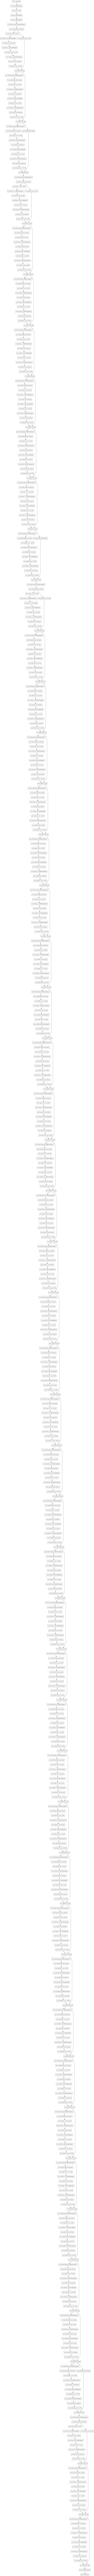

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(base_model,to_file='model.png')

In [12]:
for i, layer in enumerate (base_model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 pool1_pad
4 pool1_pool
5 conv2_block1_preact_bn
6 conv2_block1_preact_relu
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_pad
11 conv2_block1_2_conv
12 conv2_block1_2_bn
13 conv2_block1_2_relu
14 conv2_block1_0_conv
15 conv2_block1_3_conv
16 conv2_block1_out
17 conv2_block2_preact_bn
18 conv2_block2_preact_relu
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_pad
23 conv2_block2_2_conv
24 conv2_block2_2_bn
25 conv2_block2_2_relu
26 conv2_block2_3_conv
27 conv2_block2_out
28 conv2_block3_preact_bn
29 conv2_block3_preact_relu
30 conv2_block3_1_conv
31 conv2_block3_1_bn
32 conv2_block3_1_relu
33 conv2_block3_2_pad
34 conv2_block3_2_conv
35 conv2_block3_2_bn
36 conv2_block3_2_relu
37 max_pooling2d
38 conv2_block3_3_conv
39 conv2_block3_out
40 conv3_block1_preact_bn
41 conv3_block1_preact_relu
42 conv3_block1_1_conv
43 conv3_block1_1_bn
44 conv3_block1_1_relu
45 conv3_block1_2_pad
46 

In [19]:
for layer in base_model.layers[:40]:
    layer.trainable=False 
for layer in base_model.layers[40:]:
    layer.trainable=True

ACCURACY AFTER ADDING ONE MORE DENSE LAYER IN NEW MODEL (LESS ACCURACY THAN PREVIOUS)

In [17]:
optimizer=K.optimizers.Adam(1e-5)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['acc'])
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=300,epochs=5,verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 391s 8ms/sample - loss: 1.5899 - acc: 0.4919 - val_loss: 0.8383 - val_acc: 0.7939
Epoch 2/5
50000/50000 [==============================] - 404s 8ms/sample - loss: 0.7224 - acc: 0.7850 - val_loss: 0.5314 - val_acc: 0.8392
Epoch 3/5
50000/50000 [==============================] - 404s 8ms/sample - loss: 0.5358 - acc: 0.8300 - val_loss: 0.4464 - val_acc: 0.8547
Epoch 4/5
50000/50000 [==============================] - 404s 8ms/sample - loss: 0.4670 - acc: 0.8473 - val_loss: 0.4072 - val_acc: 0.8640
Epoch 5/5
50000/50000 [==============================] - 404s 8ms/sample - loss: 0.4243 - acc: 0.8596 - val_loss: 0.3846 - val_acc: 0.8696
